In [1]:
import numpy as np

from pyxpcs.config import PyXPCSDict

from pyxpcs.utils import config_from_8idhdf5, load_results
from pyxpcs.viz import plot_pix_sum, plot_as_image



In [2]:
Rigaku_FILE = "/home/faisal/Development/xpcs-eigen/data/rigaku/B873_Thermalgel20pct_att2_7C_Rq0_00005.bin"
HDF5_FILE = "/home/faisal/Development/xpcs-eigen/data/rigaku/B873_Thermalgel20pct_att2_7C_Rq0_00005_0001-100000.hdf"

In [3]:
config = config_from_8idhdf5(HDF5_FILE)
try:
    import pandas as pd
    df = pd.DataFrame.from_dict(config, orient='index')
    print(df)
except:
    pass

                                                                   0
rows                                                             512
cols                                                            1024
pixels                                                        524288
frame_start                                                        1
frame_end                                                     100000
frame_start_limit                                                201
frame_end_limit                                               100000
frames                                                         99799
delays_per_level                                                   4
dqmap              [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
sqmap              [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
roi_1d             [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 3...
beam_center_x                                                  321.8
beam_center_y                     

In [4]:
with open(Rigaku_FILE) as f:
    a = np.fromfile(f, dtype=np.uint64)
    
    b = (a >> 5+11)
    pix_ind = (b & 2**21-1).astype(int)
    pix_count = (a & 2**12-1).astype(int)
    pix_frame = (a >> 64-24).astype(int)


In [5]:
pix_ind

array([  6669,  12652,  19597, ..., 506422, 513136, 518658])

In [6]:
pix_frame

array([    0,     0,     0, ..., 99999, 99999, 99999])

In [7]:
pix_count

array([1, 1, 1, ..., 1, 1, 1])

In [8]:
%%time
import libpyxpcs as libpx


CPU times: user 506 µs, sys: 385 µs, total: 891 µs
Wall time: 739 µs


In [10]:
%%time
sparse_data = libpx.sparse_lil_index_value_count(pix_ind, pix_frame, pix_count, np.max(pix_ind)+1)

CPU times: user 23.7 s, sys: 600 ms, total: 24.3 s
Wall time: 24.2 s


In [11]:
%%time
mini_config = {
    'frames': config['frames'],
    'pixels': config['cols'] * config['rows'],
    'delays_per_level': config['delays_per_level'],
    'rows': config['rows'],
    'cols': config['cols'],  
}

G2, IP, IF = libpx.multitau(sparse_data, mini_config)

CPU times: user 4min 6s, sys: 349 ms, total: 4min 7s
Wall time: 31.8 s


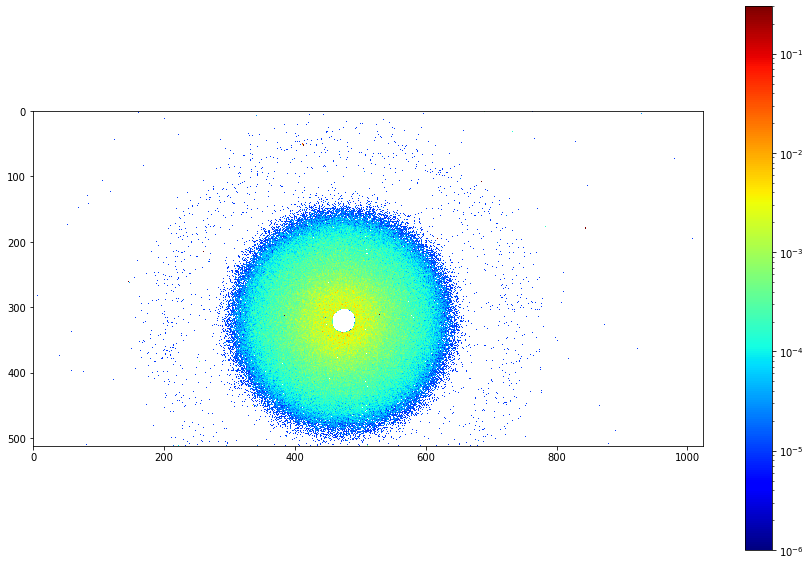

In [12]:
G2_plot = G2[0].reshape(config['rows'], config['cols'])
plot_as_image(G2_plot)

In [13]:
G2.shape

(61, 524288)